In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Leyendo los datos

Para leer un archivo de excel (.xls) puedes utilizar la librería `pandas`, aquí puedes encontrar la documentación para hacer esto:  
[Leer excel con pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [337]:
df = pd.read_excel("./IMM_2020.xls", 
                   sheet_name="IMM_2020", # Queremos una pestaña específica
                   header=0,              # Qué fila usar como los headers del DataFrame (0 index)
                   )

df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


## 1.1 Leyendo el diccionario de datos
Esto nos brindará una mejor comprensión de los nombres de las columnas.

In [338]:
dicc = pd.read_excel("./IMM_2020.xls", 
                   sheet_name="Diccionario", # Queremos una pestaña específica
                   header=2,              # Qué fila usar como los headers del DataFrame (0 index)
                   )

dicc.head(-1)

,Variable,Descripción
0,CVE_ENT,Clave de entidad federativa
1,NOM_ENT,Nombre de entidad federativa
2,CVE_MUN,Clave del municipio
3,NOM_MUN,Nombre del municipio
4,POB_TOT,Población total
5,ANALF,Porcentaje de población analfabeta de 15 años ...
6,SBASC,Porcentaje de población de 15 años o más sin e...
7,OVSDE,Porcentaje de ocupantes en viviendas particula...
8,OVSEE,Porcentaje de ocupantes en viviendas particula...
9,OVSAE,Porcentaje de ocupantes en viviendas particula...


## 2. Explorando los datos

### 2.1 Tipo de los datos, espacio utilizado y valores faltantes

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_ENT   2469 non-null   int64  
 1   NOM_ENT   2469 non-null   object 
 2   CVE_MUN   2469 non-null   int64  
 3   NOM_MUN   2469 non-null   object 
 4   POB_TOT   2469 non-null   int64  
 5   ANALF     2469 non-null   float64
 6   SBASC     2469 non-null   float64
 7   OVSDE     2469 non-null   float64
 8   OVSEE     2469 non-null   float64
 9   OVSAE     2469 non-null   float64
 10  OVPT      2469 non-null   float64
 11  VHAC      2469 non-null   float64
 12  PL.5000   2469 non-null   float64
 13  PO2SM     2469 non-null   float64
 14  IM_2020   2469 non-null   float64
 15  GM_2020   2469 non-null   object 
 16  IMN_2020  2469 non-null   float64
dtypes: float64(11), int64(3), object(3)
memory usage: 328.0+ KB


De aquí podemo extraer la siguiente información:
- Hay un total de 2,469 registros
- No existen valores faltantes
- La mayoría de los datos son numéricos
- Los datos ocupan poco espacio (328 KB)

### 2.2 Estadísticas básicas

In [340]:
df.describe().applymap('{:,.3f}'.format) # Para que no muestre tantos decimales

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,"2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000"
mean,19.215,"19,324.165","51,038.487",10.164,45.853,3.160,1.501,6.118,7.987,26.566,69.900,82.144,53.956,0.845
std,7.367,"7,382.892","146,990.726",7.634,13.982,5.289,2.769,9.246,8.974,10.587,35.268,11.830,3.905,0.061
min,1.000,"1,001.000",81.000,0.353,5.535,0.000,0.000,0.000,0.000,3.950,0.000,28.453,21.407,0.335
25%,14.000,"14,079.000","4,489.000",4.428,35.738,0.652,0.366,0.878,1.655,18.725,40.130,74.616,51.844,0.812
50%,20.000,"20,226.000","13,552.000",8.203,46.339,1.428,0.828,2.452,4.714,25.000,100.000,84.643,54.424,0.852
75%,24.000,"24,027.000","35,284.000",13.787,55.856,3.343,1.678,7.286,11.030,32.821,100.000,91.620,56.696,0.888
max,32.000,"32,058.000","1,922,523.000",53.071,88.328,64.450,53.065,81.788,68.150,69.564,100.000,100.000,62.397,0.977


Obsevando las estadísticas rápidamente, podriamos decir qué:  
- En promedio, existe un 10% de población analfabeta de 15 años o más.  
- Hay municipios donde existe un 53% de la población con analfabetismo.
- La media del porcentaje de población de 15 años o más sin educación básica es de un 45%.
- El promedio de porcentaje de población que vive en hacinamiento es del 26%.
- Hay un 70% de población que vive en localidades menores a 5,000 habitantes.

In [341]:
df.describe(include=object)

,NOM_ENT,NOM_MUN,GM_2020
count,2469,2469,2469
unique,32,2328,5
top,Oaxaca,Benito Juárez,Muy bajo
freq,570,7,655


In [342]:
df[df["GM_2020"] == "Muy bajo"]["GM_2020"]

0       Muy bajo
1       Muy bajo
2       Muy bajo
3       Muy bajo
4       Muy bajo
          ...   
2458    Muy bajo
2462    Muy bajo
2465    Muy bajo
2466    Muy bajo
2467    Muy bajo
Name: GM_2020, Length: 655, dtype: object

# c.
Realizar una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en archivo png

Primero agrupamos por Estado y por nivel de marginación

In [507]:
df_agrupado = df.groupby(["NOM_ENT", "GM_2020"])["CVE_ENT"].count().reset_index()
df_agrupado = df_agrupado.rename(columns={"CVE_ENT":"Conteo", "NOM_ENT": "Estado", "GM_2020":"Nivel_marginacion"})

In [508]:
df_agrupado.head()

,Estado,Nivel_marginacion,Conteo
0,Aguascalientes,Muy bajo,11
1,Baja California,Medio,1
2,Baja California,Muy bajo,5
3,Baja California Sur,Muy bajo,5
4,Campeche,Alto,2


In [510]:
df_agrupado[df_agrupado["Estado"] == "Baja California"]

,Estado,Nivel_marginacion,Conteo
1,Baja California,Medio,1
2,Baja California,Muy bajo,5


Alhunas operaciones para extraer las labels de los Estado y de los niveles, reseteamos el indice para tener un DataFrame con un formato más comun

In [511]:
estados = df_agrupado["Estado"].unique()
nivel_marg = df_agrupado["Nivel_marginacion"].unique()

In [512]:
# Reindexar el DataFrame agrupado para asegurarse de que todos los grupos tengan un valor asignado
df_agrupado = (df_agrupado.set_index(['Estado', 'Nivel_marginacion'])
               .reindex(pd.MultiIndex.from_product([estados, nivel_marg], names=['Estado', 'Nivel_marginacion']))
               .reset_index())
df_agrupado['Conteo'] = df_agrupado['Conteo'].fillna(0)  # Rellenar los valores faltantes con 0

In [514]:
df_agrupado.head()

,Estado,Nivel_marginacion,Conteo
0,Aguascalientes,Muy bajo,11.0
1,Aguascalientes,Medio,0.0
2,Aguascalientes,Alto,0.0
3,Aguascalientes,Bajo,0.0
4,Aguascalientes,Muy alto,0.0


Contamos el número de municipios por Estado, esto para obtener el porcentaje de cada nivel

In [501]:
num_municipios = df.groupby(["NOM_ENT"]).count()["CVE_ENT"].values
num_municipios

array([ 11,   6,   5,  12, 124,  67,  16,  38,  10,  39,  46,  81,  84,
       125, 113,  36, 125,  20,  51, 570, 217,  18,  11,  58,  18,  72,
        17,  43,  60, 212, 106,  58], dtype=int64)

Obtenemos el porcentaje y lo ponemos en una nueva columna

In [518]:
df_agrupado2 = df_agrupado.copy()
df_agrupado2["Porcentaje munic"] = df_agrupado2["Conteo"] / np.repeat(num_municipios,5)

In [519]:
df_agrupado2.head()

,Estado,Nivel_marginacion,Conteo,Porcentaje munic
0,Aguascalientes,Muy bajo,11.0,1.0
1,Aguascalientes,Medio,0.0,0.0
2,Aguascalientes,Alto,0.0,0.0
3,Aguascalientes,Bajo,0.0,0.0
4,Aguascalientes,Muy alto,0.0,0.0


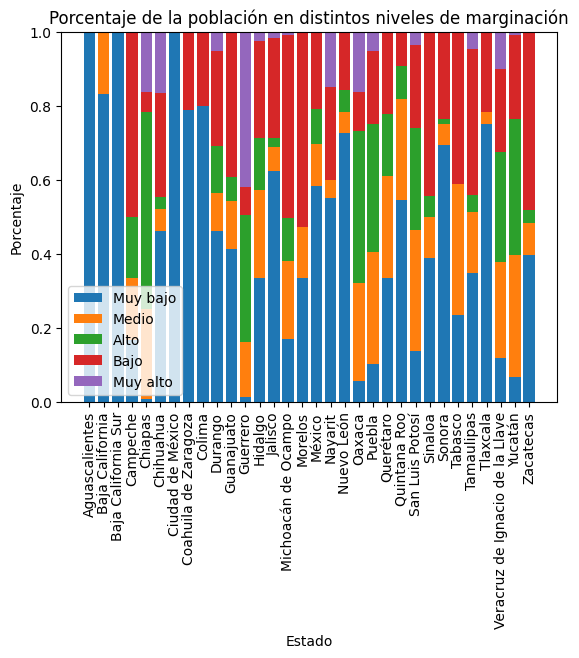

In [520]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = df_agrupado2[["Estado", "Nivel_marginacion", "Porcentaje munic"]]

# Obtener las categorías y los nombres de las variables
categorias = df2['Estado'].unique()
variables = df2['Nivel_marginacion'].unique()

# Crear el gráfico de barras apiladas con el máximo de 1
fig, ax = plt.subplots()

# Configurar la posición de las barras
posicion = range(len(categorias))

# Dibujar las barras apiladas
bottom = [0] * len(categorias)
for variable in variables:
    sub_df2 = df2[df2['Nivel_marginacion'] == variable]
    porcentajes = sub_df2['Porcentaje munic'].tolist()
    ax.bar(posicion, porcentajes, bottom=bottom, label=variable)
    bottom = [i + j for i, j in zip(bottom, porcentajes)]

# Configuración del gráfico
ax.set_xticks(posicion)
ax.set_xticklabels(categorias, rotation=90)
ax.set_xlabel('Estado')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de la población en distintos niveles de marginación')
ax.legend()

# Mostrar el gráfico
plt.show()


In [478]:
agrupado = df.groupby(["NOM_ENT", "GM_2020"])

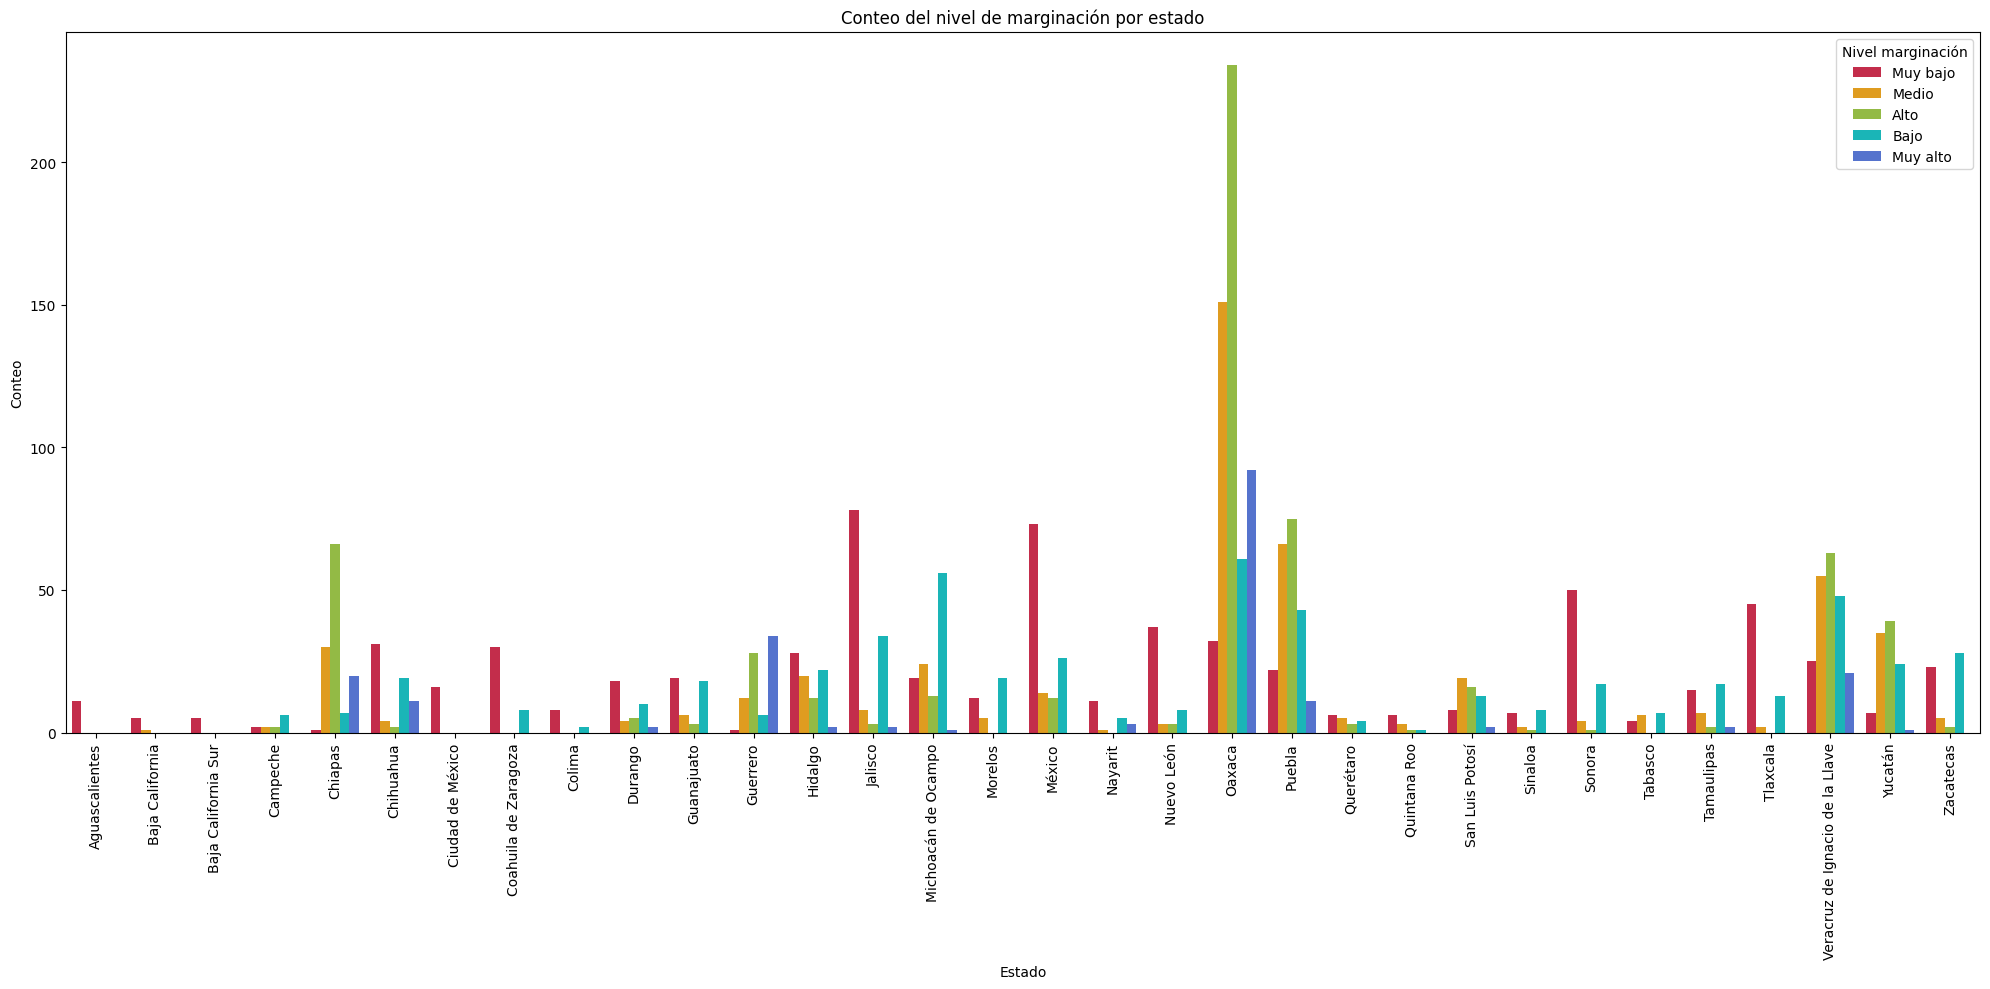

In [355]:
import seaborn as sns

colores = ["crimson", "orange", "yellowgreen", "darkturquoise", "royalblue"]

plt.figure(figsize=(20,10))
sns.barplot(x="Estado", y="Conteo", hue="Nivel_marginacion", data=df_agrupado, palette=colores)
plt.xticks(rotation=90)
plt.title("Conteo del nivel de marginación por estado")
plt.legend(title="Nivel marginación")
plt.tight_layout()
plt.savefig("nivel_marginacion_por_estado.png")
plt.show()

In [415]:
df.groupby(["NOM_ENT", "GM_2020"]).count()

CVE_ENT  CVE_MUN  NOM_MUN  POB_TOT  ANALF  \
NOM_ENT             GM_2020                                               
Aguascalientes      Muy bajo       11       11       11       11     11   
Baja California     Medio           1        1        1        1      1   
                    Muy bajo        5        5        5        5      5   
Baja California Sur Muy bajo        5        5        5        5      5   
Campeche            Alto            2        2        2        2      2   
...                               ...      ...      ...      ...    ...   
Yucatán             Muy bajo        7        7        7        7      7   
Zacatecas           Alto            2        2        2        2      2   
                    Bajo           28       28       28       28     28   
                    Medio           5        5        5        5      5   
                    Muy bajo       23       23       23       23     23   

                              SBASC  OVSDE  OVSEE  OVSAE  OVPT  VHAC  PL.5000  \
NOM_ENT             GM_2020                                                     
Aguascalientes      Muy bajo     11     11     11     11    11    11       11   
Baja California     Medio         1      1      1      1     1     1        1   
                    Muy bajo      5      5      5      5     5     5        5   
Baja California Sur Muy bajo      5      5      5      5     5     5        5   
Campeche            Alto          2      2      2      2     2     2        2   
...                             ...    ...    ...    ...   ...   ...      ...   
Yucatán             Muy bajo      7      7      7      7     7     7        7   
Zacatecas           Alto          2      2      2      2     2     2        2   
                    Bajo         28     28     28     28    28    28       28   
                    Medio         5      5      5      5     5     5        5   
                    Muy bajo     23     23     23     23    23    23       23   

                              PO2SM  IM_2020  IMN_2020  
NOM_ENT             GM_2020                             
Aguascalientes      Muy bajo     11       11        11  
Baja California     Medio         1        1         1  
                    Muy bajo      5        5         5  
Baja California Sur Muy bajo      5        5         5  
Campeche            Alto          2        2         2  
...                             ...      ...       ...  
Yucatán             Muy bajo      7        7         7  
Zacatecas           Alto          2        2         2  
                    Bajo         28       28        28  
                    Medio         5        5         5  
                    Muy bajo     23       23        23  

[123 rows x 15 columns]

[10, 20, 15]
[5, 15, 10]
[8, 12, 10]


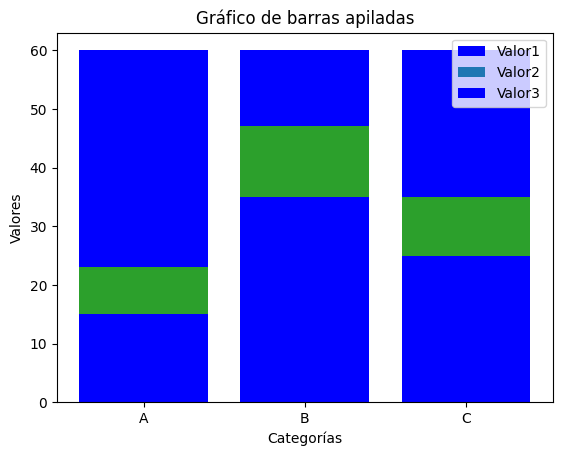

In [458]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame de ejemplo
data = {
    'Categoria': ['A', 'B', 'C'],
    'Valor1': [10, 20, 15],
    'Valor2': [5, 15, 10],
    'Valor3': [8, 12, 10]
}
totales = [30, 50, 60]
df2 = pd.DataFrame(data)

# Obtener las categorías y los nombres de las columnas de valores
categorias = df2['Categoria'].tolist()
columnas_valores = df2.columns[1:]  # Excluir la columna 'Categoria'

# Crear el gráfico de barras apiladas utilizando Matplotlib
fig, ax = plt.subplots()

# Configurar la posición de las barras
posicion = range(len(categorias))

# Dibujar las barras apiladas
bottom = None
labels = []  # Etiquetas personalizadas para la leyenda
k = 0
for columna_valor in columnas_valores:
    valores = df2[columna_valor].tolist()
    barra = ax.bar(posicion, valores, bottom=bottom)
    labels.append(columna_valor)  # Agregar el nombre de la columna a las etiquetas personalizadas
    if bottom is None:
        bottom = valores
    else:
        bottom = [i + j for i, j in zip(bottom, valores)]

    k += 1

# Configuración del gráfico
ax.set_xticks(posicion)
ax.set_xticklabels(categorias)
ax.set_xlabel('Categorías')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de barras apiladas')
ax.legend(labels)  # Pasar las etiquetas personalizadas a la leyenda

# Mostrar el gráfico
plt.show()


In [452]:
df_agrupado

,Estado,Nivel_marginacion,Conteo
0,Aguascalientes,Muy bajo,11.0
1,Aguascalientes,Medio,0.0
2,Aguascalientes,Alto,0.0
3,Aguascalientes,Bajo,0.0
4,Aguascalientes,Muy alto,0.0
...,...,...,...
155,Zacatecas,Muy bajo,23.0
156,Zacatecas,Medio,5.0
157,Zacatecas,Alto,2.0
158,Zacatecas,Bajo,28.0


In [ ]:
df.groupby("NOM_ENT")

array([ 11,   6,   5,  12, 124,  67,  16,  38,  10,  39,  46,  81,  84,
       125, 113,  36, 125,  20,  51, 570, 217,  18,  11,  58,  18,  72,
        17,  43,  60, 212, 106,  58], dtype=int64)

In [454]:
df_agrupado2.head()

,Estado,Nivel_marginacion,Conteo
0,Aguascalientes,Muy bajo,11.0
1,Aguascalientes,Medio,0.0
2,Aguascalientes,Alto,0.0
3,Aguascalientes,Bajo,0.0
4,Aguascalientes,Muy alto,0.0


In [446]:
df.groupby(["NOM_ENT"]).sum()["CVE_ENT"].values

array([   11,    12,    15,    48,   868,   536,   144,   190,    60,
         390,   506,   972,  1092,  1750,  1808,   612,  1875,   360,
         969, 11400,  4557,   396,   253,  1392,   450,  1872,   459,
        1204,  1740,  6360,  3286,  1856], dtype=int64)

In [357]:
df["NOM_ENT"].value_counts()

NOM_ENT
Oaxaca                             570
Puebla                             217
Veracruz de Ignacio de la Llave    212
México                             125
Jalisco                            125
Chiapas                            124
Michoacán de Ocampo                113
Yucatán                            106
Hidalgo                             84
Guerrero                            81
Sonora                              72
Chihuahua                           67
Tlaxcala                            60
San Luis Potosí                     58
Zacatecas                           58
Nuevo León                          51
Guanajuato                          46
Tamaulipas                          43
Durango                             39
Coahuila de Zaragoza                38
Morelos                             36
Nayarit                             20
Querétaro                           18
Sinaloa                             18
Tabasco                             17
Ciudad de México 

In [358]:
df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


In [359]:
pob_por_estado = df.groupby(["NOM_ENT"])["POB_TOT"].sum()

In [360]:
loc_menos_5k = df[df["POB_TOT"] < 5000]

In [362]:
df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


# f

<Axes: xlabel='PL.5000', ylabel='ANALF'>

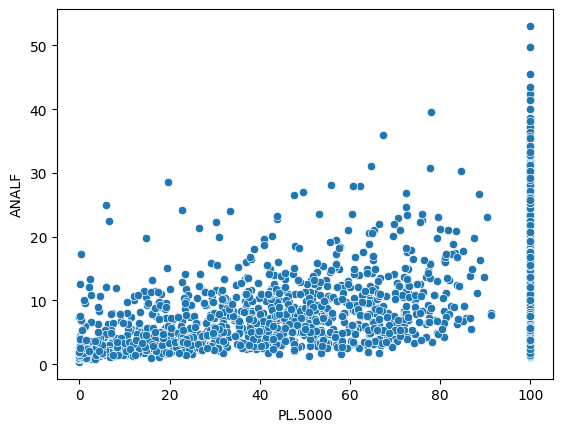

In [364]:
sns.scatterplot(x="PL.5000", y="ANALF", data=df)

# g.
¿Existe una relación? ¿Cómo podrías analizar con que variable tiene mñas corelación el porcentaje de analfabetismo en personas mayores de 15 años?

- Existe una ligera relación, ya que se observa que para valores altos de la variable PL.5000, hay valores más altos de analfabetismo, pero esto no sucede en todos los casos.
- Para anlizar con qué variables el porcentaje de analfabetismo tiene más correlacion, podemos utilizar el metodo `corr`

In [410]:
corr = df.select_dtypes(include=np.number).corr()["ANALF"]
print("Valor de correlación con variables")
print(corr.sort_values(ascending=False, key=lambda x: abs(x)))

Valor de correlación con variables
ANALF       1.000000
IMN_2020   -0.847822
IM_2020    -0.847822
SBASC       0.779053
VHAC        0.658532
OVPT        0.644960
PO2SM       0.620011
PL.5000     0.449324
OVSAE       0.360644
OVSEE       0.351523
OVSDE       0.347537
POB_TOT    -0.236801
CVE_MUN     0.013398
CVE_ENT     0.008475
Name: ANALF, dtype: float64


- Aquí se puede observar que tiene más relación con los índices de marginalización (IMN_2020, IM_2020) y con SBASC (porcentaje de población de 15 años o más sin educación básica)

Para ver la correlación entre todas las variables, podemos utilizar una matriz de correlación.

<Axes: >

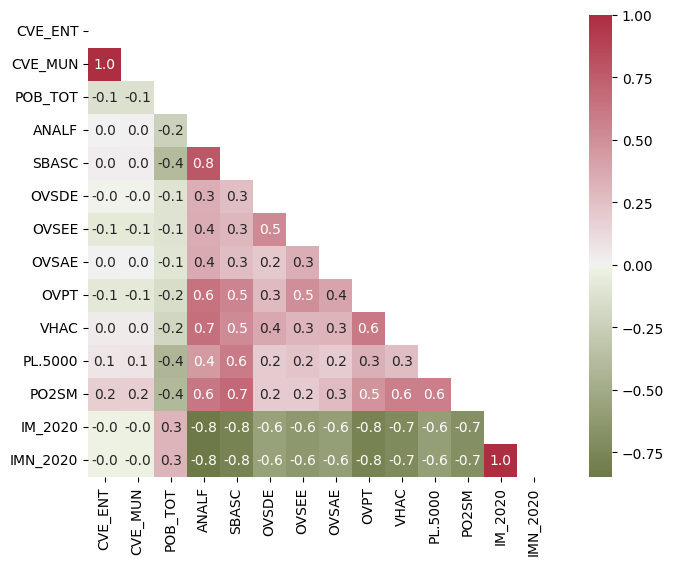

In [408]:
corr = df.select_dtypes(include=np.number).corr()

cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
                            
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.1f', square=True, cmap=cmap)

CVE_ENT     0.008475
CVE_MUN     0.013398
POB_TOT    -0.236801
ANALF       1.000000
SBASC       0.779053
OVSDE       0.347537
OVSEE       0.351523
OVSAE       0.360644
OVPT        0.644960
VHAC        0.658532
PL.5000     0.449324
PO2SM       0.620011
IM_2020    -0.847822
IMN_2020   -0.847822
Name: ANALF, dtype: float64

IndexError: Inconsistent shape between the condition and the input (got (14, 1) and (14,))

<Figure size 1000x600 with 0 Axes>